## **Load and Prepare the Data**

In [2]:
import pandas as pd

data = pd.read_csv("/content/pseudo_facebook.csv")

print(data.head())
print(data.info())
print(data.describe())

    userid  age  dob_day  dob_year  dob_month  gender  tenure  friend_count  \
0  2094382   14       19      1999         11    male   266.0             0   
1  1192601   14        2      1999         11  female     6.0             0   
2  2083884   14       16      1999         11    male    13.0             0   
3  1203168   14       25      1999         12  female    93.0             0   
4  1733186   14        4      1999         12    male    82.0             0   

   friendships_initiated  likes  likes_received  mobile_likes  \
0                      0      0               0             0   
1                      0      0               0             0   
2                      0      0               0             0   
3                      0      0               0             0   
4                      0      0               0             0   

   mobile_likes_received  www_likes  www_likes_received  
0                      0          0                   0  
1                 

## **Data Cleaning**

In [3]:
print(data.isnull().sum())

data["dob"] = pd.to_datetime(data["dob_year"].astype(str) + "-" + data["dob_month"].astype(str) + "-" + data["dob_day"].astype(str), errors="coerce")

data["calculated_age"] = 2025 - data["dob_year"]
print("Age mismatches:", (data["age"] != data["calculated_age"]).sum())

data = data.dropna(subset=["dob"])

userid                     0
age                        0
dob_day                    0
dob_year                   0
dob_month                  0
gender                   175
tenure                     2
friend_count               0
friendships_initiated      0
likes                      0
likes_received             0
mobile_likes               0
mobile_likes_received      0
www_likes                  0
www_likes_received         0
dtype: int64
Age mismatches: 99003


## **Installing Libraries**

In [4]:
pip install seaborn matplotlib

In [5]:
pip install -U kaleido


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.2 MB/s eta 0:00:00


## **Bar Chart for Likes Received by Month of Birth**

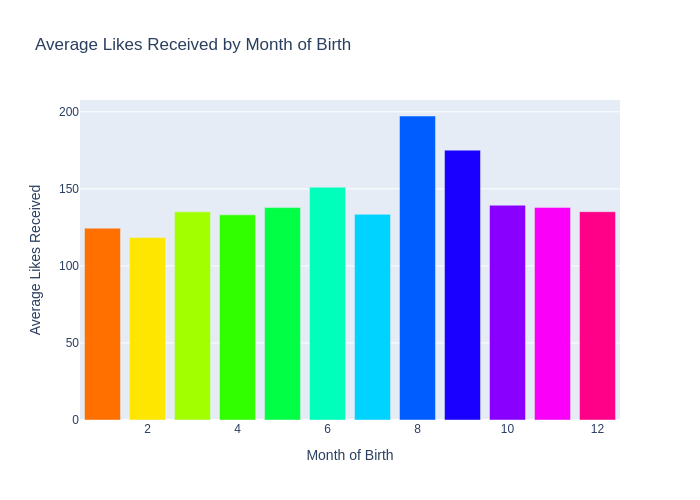

In [19]:
import os
import pandas as pd
import plotly.graph_objects as go
import seaborn as sns
from IPython.display import Image

likes_by_month = data.groupby("dob_month")["likes_received"].mean()

colors = sns.color_palette("hsv", 12).as_hex()

fig = go.Figure(
    data=[
        go.Bar(
            x=likes_by_month.index,
            y=likes_by_month.values,
            name="Average Likes Received",
            marker_color=colors
        )
    ],
    layout=go.Layout(
        title="Average Likes Received by Month of Birth",
        xaxis_title="Month of Birth",
        yaxis_title="Average Likes Received"
    )
)

os.makedirs("images", exist_ok=True)
fig.write_image("images/bar_month_birth.png")

display(Image(filename="images/bar_month_birth.png"))

## **Bar Chart for Likes Received by Age Group**

<ipython-input-20-23cdd8463b90>:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



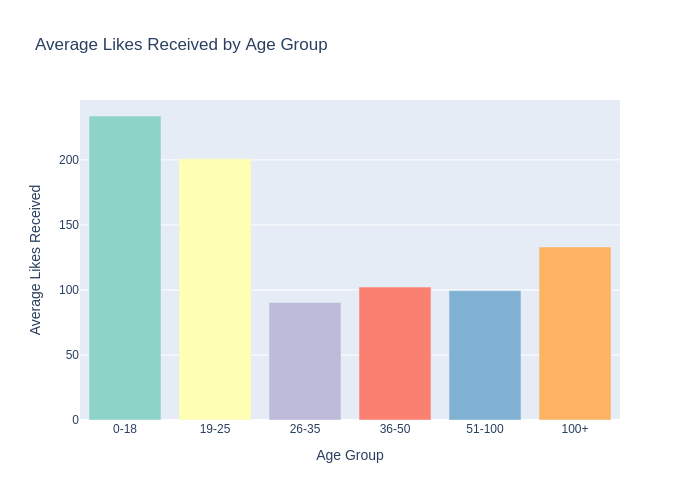

In [20]:
data["age_group"] = pd.cut(data["age"], [0, 18, 25, 35, 50, 100, 150], labels=["0-18", "19-25", "26-35", "36-50", "51-100", "100+"], right=False)
likes_by_age = data.groupby("age_group")["likes_received"].mean()
colors = sns.color_palette("Set3", 6).as_hex()
fig = go.Figure(
    data=[
        go.Bar(
            x=likes_by_age.index,
            y=likes_by_age.values,
            name="Average Likes Received",
            marker_color=colors
        )
    ],
    layout=go.Layout(
        title="Average Likes Received by Age Group",
        xaxis_title="Age Group",
        yaxis_title="Average Likes Received"
    )
)
fig.write_image("images/bar_age_group.png")
display(Image(filename="images/bar_age_group.png"))

## **Bar chart for Likes Received by Gender**

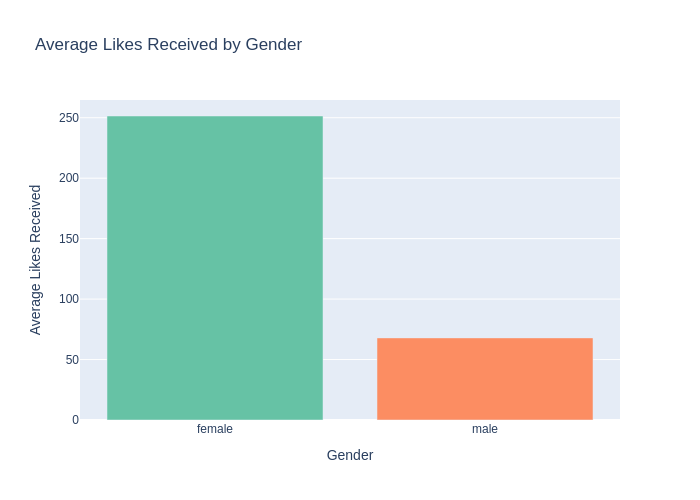

In [21]:
likes_by_gender = data.groupby("gender")["likes_received"].mean()
colors = sns.color_palette("Set2", 2).as_hex()
fig = go.Figure(
    data=[
        go.Bar(
            x=likes_by_gender.index,
            y=likes_by_gender.values,
            name="Average Likes Received",
            marker_color=colors
        )
    ],
    layout=go.Layout(
        title="Average Likes Received by Gender",
        xaxis_title="Gender",
        yaxis_title="Average Likes Received"
    )
)
fig.write_image("images/bar_gender.png")
display(Image(filename="images/bar_gender.png"))

## **Scatter Plot for Likes Received vs. Friend Count**

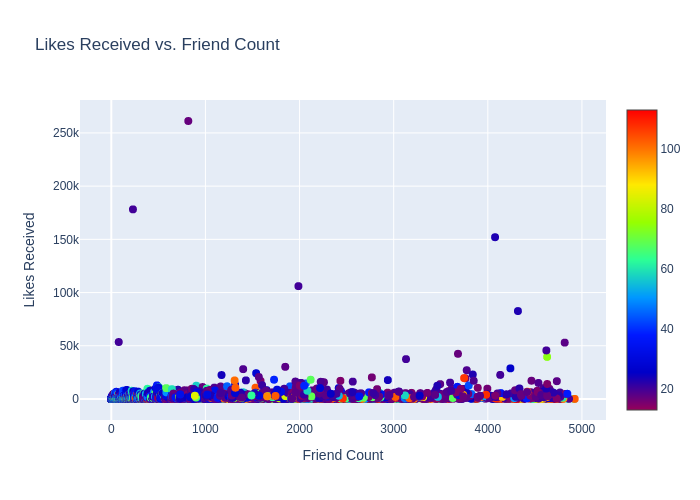

In [22]:
fig = go.Figure(
    data=[
        go.Scatter(
            x=data["friend_count"],
            y=data["likes_received"],
            mode="markers",
            marker=dict(
                color=data["age"],
                colorscale="Rainbow",
                showscale=True,
                size=8
            ),
            name="Likes Received vs. Friend Count"
        )
    ],
    layout=go.Layout(
        title="Likes Received vs. Friend Count",
        xaxis_title="Friend Count",
        yaxis_title="Likes Received"
    )
)
fig.write_image("images/scatter_likes_friends.png")
display(Image(filename="images/scatter_likes_friends.png"))

## **Mobile vs. Web Likes Received**

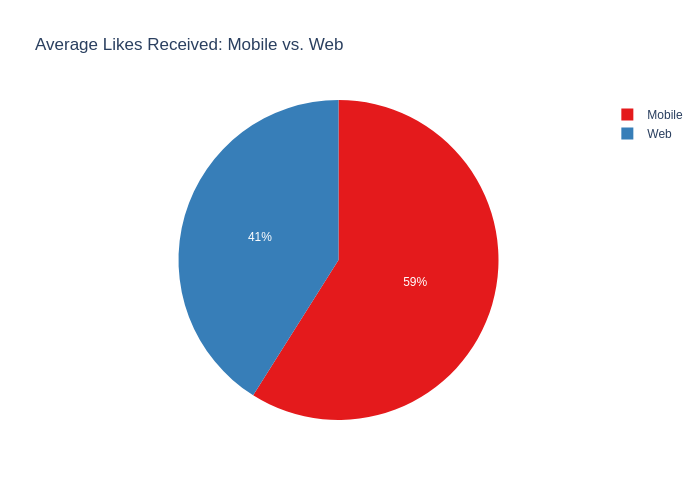

In [23]:
import pandas as pd
import plotly.graph_objects as go
import seaborn as sns

colors = sns.color_palette("Set1", 2).as_hex()
fig = go.Figure(
    data=[
        go.Pie(
            labels=["Mobile", "Web"],
            values=[data["mobile_likes_received"].mean(), data["www_likes_received"].mean()],
            hole=0,
            marker_colors=colors
        )
    ],
    layout=go.Layout(
        title="Average Likes Received: Mobile vs. Web"
    )
)
fig.write_image("images/pie_mobile_web.png")
display(Image(filename="images/pie_mobile_web.png"))

## **Prepare the Data**

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

features = ["friend_count", "tenure", "age", "mobile_likes_received", "www_likes_received"]
X = data[features]
y = data["likes_received"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-squared:", r2_score(y_test, y_pred))

feature_importance = pd.Series(model.feature_importances_, index=features)
print("Feature Importance:\n", feature_importance.sort_values(ascending=False))

Mean Squared Error: 36603.25842208976
R-squared: 0.9863000884323999
Feature Importance:
 mobile_likes_received    0.667120
www_likes_received       0.316725
age                      0.008173
tenure                   0.004572
friend_count             0.003410
dtype: float64


## **Visualize Predictions**

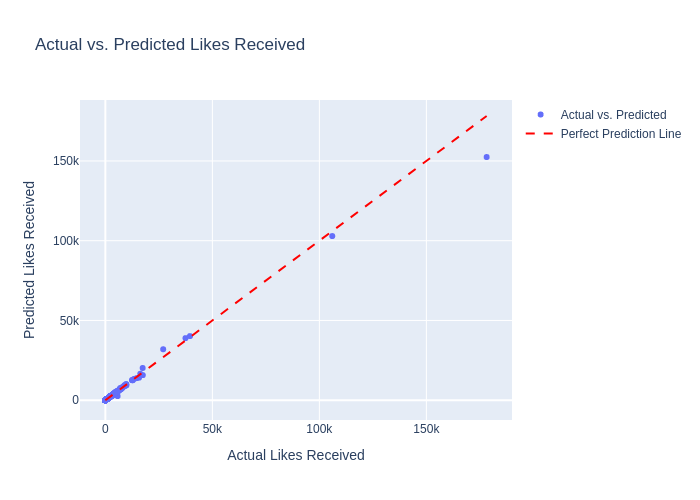

In [25]:
fig = go.Figure(
    data=[
        go.Scatter(
            x=y_test,
            y=y_pred,
            mode="markers",
            name="Actual vs. Predicted"
        ),
        go.Scatter(
            x=[y_test.min(), y_test.max()],
            y=[y_test.min(), y_test.max()],
            mode="lines",
            name="Perfect Prediction Line",
            line=dict(color="red", dash="dash")
        )
    ],
    layout=go.Layout(
        title="Actual vs. Predicted Likes Received",
        xaxis_title="Actual Likes Received",
        yaxis_title="Predicted Likes Received"
    )
)
fig.write_image("images/act_vs_pre.png")
display(Image(filename="images/act_vs_pre.png"))